# Import

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [239]:
houses_df = pd.read_csv('data/train.csv')

In [240]:
house_bird = houses_df.iloc[:, 1:21]
house_phil= houses_df.iloc[:, 21:41]
house_ray = houses_df.iloc[:, 41:61]
house_ty = houses_df.iloc[:, 61:]

## Missing

In [241]:
missing_cols_count = houses_df.isna().sum(0).sort_values(ascending=False)
print(missing_cols_count[missing_cols_count>0])
print("total number of observations: ", len(houses_df))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
total number of observations:  1460


#### Drop missing

In [242]:
houses_df = houses_df.loc[:, missing_cols_count < 1000].drop('Id', axis = 1)

# EDA: Tables

In [243]:
houses_obj = pd.DataFrame()
houses_int = pd.DataFrame()
houses_float = pd.DataFrame()

for col in houses_df.columns:
    if houses_df[col].dtype == object:
        houses_obj[col] = houses_df[col]
    if houses_df[col].dtype == int:
        houses_int[col] = houses_df[col]
    if houses_df[col].dtype == float:
        houses_float[col] = houses_df[col]

In [244]:
houses_obj.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,770,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,380,870,605,1311,1326,1340,1267,1198


In [245]:
houses_float.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [246]:
houses_int.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Tyler's Set

In [391]:
house_ty.dtypes

GarageCars                int64
GarageArea                int64
GarageQual               object
GarageCond               object
PavedDrive               object
WoodDeckSF                int64
OpenPorchSF               int64
EnclosedPorch             int64
3SsnPorch                 int64
ScreenPorch               int64
PoolArea                  int64
PoolQC                   object
Fence                    object
MiscFeature              object
MiscVal                   int64
MoSold                    int64
YrSold                    int64
SaleType                 object
SaleCondition            object
SalePrice                 int64
SaleType_COD              uint8
SaleType_CWD              uint8
SaleType_Con              uint8
SaleType_ConLD            uint8
SaleType_ConLI            uint8
SaleType_ConLw            uint8
SaleType_New              uint8
SaleType_Oth              uint8
SaleType_WD               uint8
SaleType_nan              uint8
SaleCondition_Abnorml     uint8
SaleCond

In [318]:
house_ty.describe()

,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.767123,472.980137,4.594521,4.628082,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.747315,213.804841,1.262078,1.231595,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,1.000000,334.500000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,2.000000,480.000000,5.000000,5.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2.000000,576.000000,5.000000,5.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,4.000000,1418.000000,5.000000,5.000000,2.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [363]:
house_ty.isna().sum()

GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [247]:
house_ty.columns

Index(['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

### 1 GarageCars

In [252]:
house_ty['GarageCars'].isnull().sum()/len(house_ty)

0.0

In [261]:
house_ty[['GarageCars']].astype(object).describe()

,GarageCars
count,1460
unique,5
top,2
freq,824


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d57c0748>]],
      dtype=object)

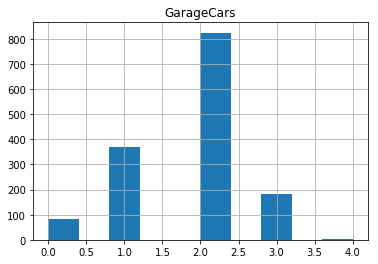

In [256]:
house_ty[['GarageCars']].hist()

### 2 GarageArea

In [254]:
house_ty['GarageArea'].isnull().sum()/len(house_ty)

0.0

In [263]:
house_ty[['GarageArea']].describe()

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d764bd30>]],
      dtype=object)

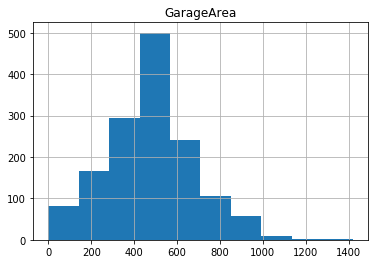

In [255]:
house_ty[['GarageArea']].hist()

### 3 GarageQual

In [310]:
set(house_df['GarageQual'])

{'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}

In [303]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
house_ty[['GarageQual']] = le.fit_transform(house_df[['GarageQual']].fillna(0).astype(str))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d57d9748>]],
      dtype=object)

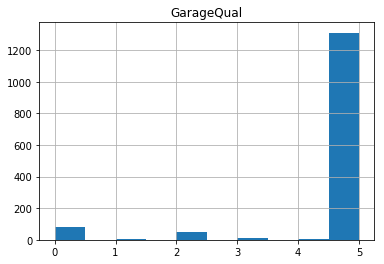

In [304]:
house_ty[['GarageQual']].hist()

In [349]:
house_ty[['GarageQual']].sum()

GarageQual    6708
dtype: int64

In [348]:
house_ty[['GarageCond']].sum()

GarageCond    6757
dtype: int64

### 4 GarageCond

In [309]:
set(house_df['GarageCond'])

{'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}

In [ ]:
house_ty[['GarageCond']] = le.fit_transform(house_df[['GarageCond']].fillna(0).astype(str))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d7375668>]],
      dtype=object)

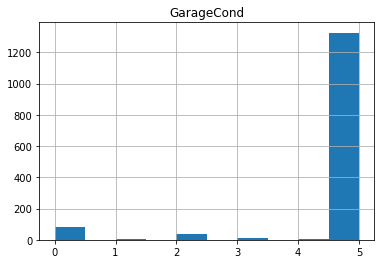

In [306]:
house_ty[['GarageCond']].hist()

### 5 PavedDrive

In [311]:
set(house_df['PavedDrive'])

{'N', 'P', 'Y'}

In [312]:
le = LabelEncoder()
house_ty[['PavedDrive']] = le.fit_transform(house_df[['PavedDrive']].fillna(0).astype(str))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d728feb8>]],
      dtype=object)

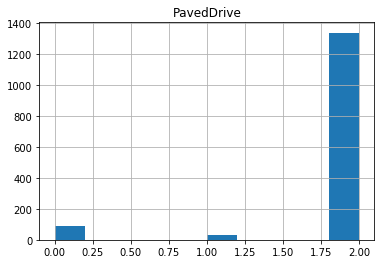

In [313]:
house_ty[['PavedDrive']].hist()

### 6  WoodDeckSF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d7162e10>]],
      dtype=object)

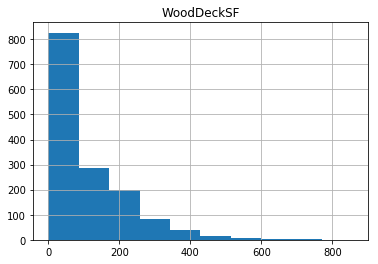

In [316]:
house_ty[['WoodDeckSF']].hist()

### 7 OpenPorchSF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d7159fd0>]],
      dtype=object)

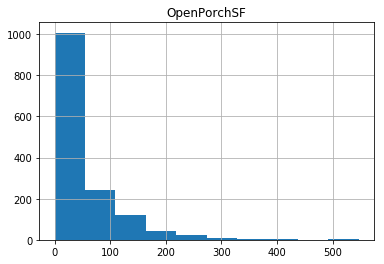

In [317]:
house_ty[['OpenPorchSF']].hist()

### 8 EnclosedPorch

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d706fa90>]],
      dtype=object)

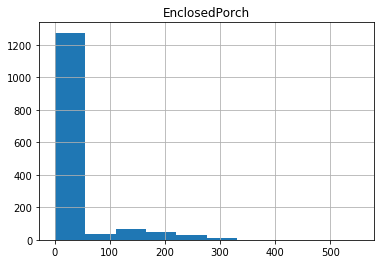

In [321]:
house_ty[['EnclosedPorch']].hist()

### 7 -10 OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch

In [327]:
house_ty[['OpenPorchSF',
'EnclosedPorch', 
'3SsnPorch',         
'ScreenPorch']].isnull().sum()

OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19da8fa748>,
      dtype=object)

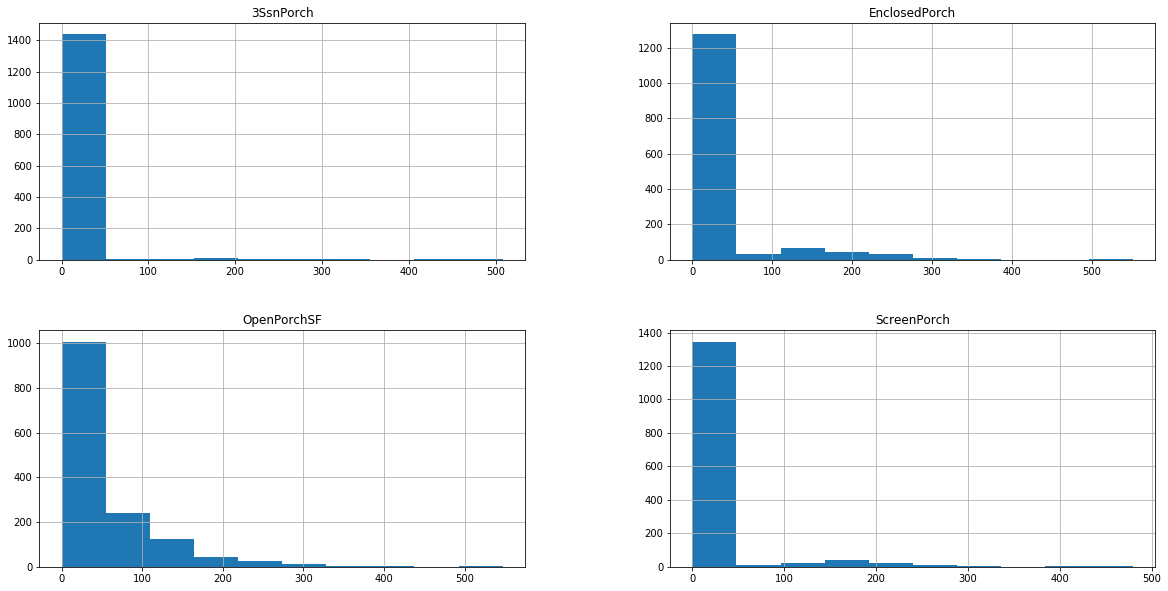

In [326]:
house_ty[['OpenPorchSF',
'EnclosedPorch', 
'3SsnPorch',         
'ScreenPorch']].hist(figsize=(20,10))

In [328]:
house_ty[['PoolArea', 'PoolQC']].isnull().sum()

PoolArea       0
PoolQC      1453
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19da219630>]],
      dtype=object)

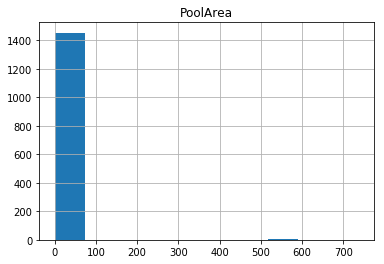

In [329]:
house_ty[['PoolArea']].hist()

# Rest

In [337]:
house_ty[['Fence',
'MiscFeature',
'MiscVal',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition',
'SalePrice']].isna().sum()

MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d9ee8940>,
      dtype=object)

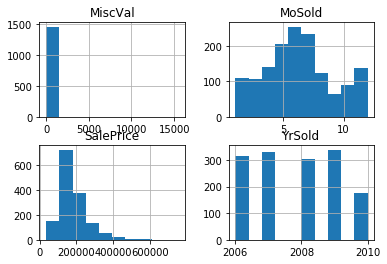

In [338]:
house_ty[[
'MiscVal',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition',
'SalePrice']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d9d155c0>]],
      dtype=object)

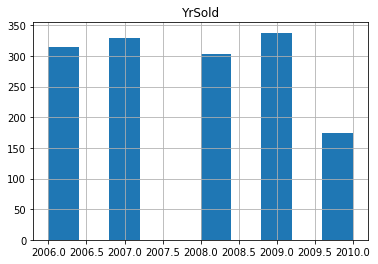

In [346]:
house_df[['YrSold']].hist()

In [341]:
le = LabelEncoder()
house_ty['SaleType'] = le.fit_transform(house_df['SaleType'])
house_ty[['SaleType']]

,SaleType
0,8
1,8
2,8
3,8
4,8
5,8
6,8
7,8
8,8
9,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d9f4fe80>]],
      dtype=object)

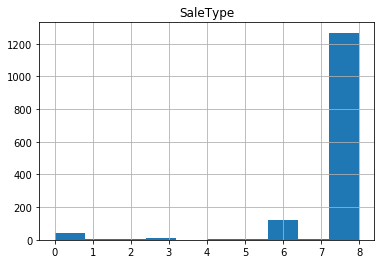

In [343]:
house_ty[['SaleType']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d9d15048>]],
      dtype=object)

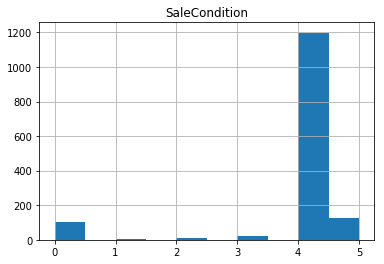

In [345]:
le = LabelEncoder()
house_ty[['SaleCondition']] = le.fit_transform(house_df['SaleCondition'])
house_ty[['SaleCondition']].hist()

# Corelated

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d9daeb00>,
      dtype=object)

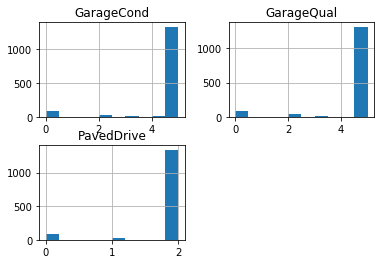

In [347]:
house_ty[['GarageQual',
'GarageCond',
'PavedDrive' ]].hist()

# Drop

In [ ]:
house_ty.drop([
    'GarageQual' # too simialr to GarageCond (but has more information)
    'PoolQC',  # all missing
    'Fence',  # over 1000 missing
    'MiscFeature', #over 1000 missing
    'MiscVal', # mostly 0
    'PoolArea',  # mostly 0
    '3SsnPorch' # mostly 0
]

In [361]:
house_ty[[
    'Fence', 
    'MiscFeature', 
    'MiscVal'
]].astype(object).describe()

,Fence,MiscFeature,MiscVal
count,281,54,1460
unique,4,4,21
top,MnPrv,Shed,0
freq,157,49,1408


In [360]:
print(sum(set(house_ty['3SsnPorch'])), sum(set(house_ty['PoolArea'])))

4102 4028


In [ ]:
PoolQC           1453
Fence            1179
MiscFeature      1406

In [376]:
set(house_ty['3SsnPorch'])

{0,
 23,
 96,
 130,
 140,
 144,
 153,
 162,
 168,
 180,
 182,
 196,
 216,
 238,
 245,
 290,
 304,
 320,
 407,
 508}

In [365]:
house_ty[[
    'MiscVal', # mostly 0
    'PoolArea',  # mostly 0
    '3SsnPorch' # mostly 0
]].astype(object).describe()

,MiscVal,PoolArea,3SsnPorch
count,1460,1460,1460
unique,21,8,20
top,0,0,0
freq,1408,1453,1436


In [384]:
dummies = pd.get_dummies(house_df[[
    'SaleType', 
    'SaleCondition', 
    'PavedDrive', 
    'GarageCond', 
    'GarageQual']], dummy_na=True)

In [388]:
dummies = pd.get_dummies(house_df[[
    'SaleType', 
    'SaleCondition', 
    'PavedDrive', 
    'GarageCond', 
    'GarageQual']], dummy_na=True)


house_ty = pd.concat([house_ty, dummies], axis = 1)

In [390]:
house_ty.to_pickle('house_ty.pkl')